In [1]:
import pandas as pd

# Equivalent of numpy & matplotlib
%pylab inline

import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


#### Lecture des données

In [2]:
data_2015 = pd.read_csv('C:/Users/azade/Desktop/OC/Projet 4/2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('C:/Users/azade/Desktop/OC/Projet 4/2016-building-energy-benchmarking.csv')

## Description des données

#### Affichage des données

In [3]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 47)
(3376, 46)


In [4]:
print(data_2015.info())
print(data_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

Il y a des colonnes avec de nombreuses valeurs manquantes.

Essayer de supprimer toutes les colonnes qui n'ont pas assez valeurs.

#### Suppression de colonnes avec plus de valeurs manquantes 2015

In [5]:
data_2015.isnull().sum().sort_values(ascending=False).head(10)

Comment                            3327
Outlier                            3256
YearsENERGYSTARCertified           3230
City Council Districts             3127
2010 Census Tracts                 3116
ThirdLargestPropertyUseTypeGFA     2780
ThirdLargestPropertyUseType        2780
SecondLargestPropertyUseTypeGFA    1781
SecondLargestPropertyUseType       1781
ENERGYSTARScore                     780
dtype: int64

In [6]:
data_2015.drop(['Comment','Outlier','YearsENERGYSTARCertified','City Council Districts',
                  '2010 Census Tracts','ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType'],axis=1,
                inplace=True)

In [7]:
data_2015.shape

(3340, 40)

#### Suppression de colonnes avec plus de valeurs manquantes 2016

In [8]:
data_2016.isnull().sum().sort_values(ascending=False).head(8)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
dtype: int64

#### Removing observation with 'high outliers'

In [9]:
data_2016.drop(['Comments','Outlier','YearsENERGYSTARCertified','ThirdLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseType'],axis=1,inplace=True)

In [10]:
data_2016.shape

(3376, 41)

#### Colonnes communes en 2015 et 2016

In [11]:
set(data_2016.columns).intersection(set(data_2015.columns))

{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'YearBuilt'}

In [12]:
set(data_2016.columns).intersection(set(data_2015.columns))

{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'YearBuilt'}

In [13]:
set(data_2016.columns).difference(set(data_2015.columns))

{'Address',
 'City',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [14]:
set(data_2015.columns).difference(set(data_2016.columns))

{'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

__GHGEmissions(MetricTonsCO2e):__ The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

__GHGEmissionsIntensity(kgCO2e/ft2):__ Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

In [15]:
# On renomme les colonnes de 2015 pour que les noms des variables soient les mêmes que pour 2016 (Energy et CO2)
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                        'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                          'Zip Codes':'ZipCode'}, inplace=True)

#### Scission de la colonne 'Location' en 'latitude' et 'longitude'

__Location__ est inclus: 
address, state , zip, longitude, latitude and ..


La latitude et la longitude sont les coordonnées géographiques qui permettent de repérer un point à la surface de la Terre.

In [16]:
import ast
data_2015['Latitude']=data_2015.Location.apply(lambda x:ast.literal_eval(x)['latitude'])
data_2015['Longitude']=data_2015.Location.apply(lambda x:ast.literal_eval(x)['longitude'])

In [17]:
data_2015.drop('Location', axis=1, inplace=True)

In [18]:
set(data_2015.columns).difference(set(data_2016.columns))

{'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas'}

In [19]:
data_2015.drop(['OtherFuelUse(kBtu)', 'Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats'], axis=1, inplace= True)

#### Suppression de colonnes extra pour les données 2016

In [20]:
data_2016.drop(['Address', 'City', 'State'],inplace=True, axis=1)

In [21]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 38)
(3376, 38)


### Concaténation des données

In [59]:
data= pd.concat([data_2015, data_2016])

# to see all the columns
pd.set_option('display.max_columns', None)
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,ZipCode,Latitude,Longitude
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,18081.0,47.61219025,-122.33799744
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,18081.0,47.61310583,-122.33335756
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,18081.0,47.61334897,-122.33769944
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,18081.0,47.61421585,-122.33660889
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,19576.0,47.6137544,-122.3409238


In [60]:
data.shape

(6716, 38)

#### Vérification des valeurs en double

In [61]:
data.duplicated(['OSEBuildingID','DataYear']).sum()

0

#### Structure des données

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

#### Changer le type de "Latitude" & "Longitude"

In [26]:
data = data.astype({"Latitude":'float64',"Longitude":'float64'}) 

In [27]:
data['ZipCode'] = data['ZipCode'].apply(str)

 ## 2. Nettoyage des données

### Feature selection

#### Target: 'SiteEnergyUse(kBtu)' & 'TotalGHGEmissions'

Suppresion des colonnes non pertinentes

In [28]:
data.drop(['OSEBuildingID','PropertyName','TaxParcelIdentificationNumber','CouncilDistrictCode',
          'DefaultData','ComplianceStatus','ZipCode'], axis=1, inplace= True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6716 non-null   int64  
 1   BuildingType                     6716 non-null   object 
 2   PrimaryPropertyType              6716 non-null   object 
 3   Neighborhood                     6716 non-null   object 
 4   YearBuilt                        6716 non-null   int64  
 5   NumberofBuildings                6708 non-null   float64
 6   NumberofFloors                   6708 non-null   float64
 7   PropertyGFATotal                 6716 non-null   int64  
 8   PropertyGFAParking               6716 non-null   int64  
 9   PropertyGFABuilding(s)           6716 non-null   int64  
 10  ListOfAllPropertyUseTypes        6580 non-null   object 
 11  LargestPropertyUseType           6560 non-null   object 
 12  LargestPropertyUseTy

#### Supprimer les colonnes extra:

__Electricity(kBtu)__	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

__Electricity(kWh)__	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.

__NaturalGas(therms)__
The annual amount of utility-supplied natural gas consumed by the property, measured in therms.

__NaturalGas(kBtu)__
The annual amount of utility-supplied natural gas consumed by the property, measured in British thermal unit(s).

One therm equals 100,000 Btu

In [30]:
#Suppression des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
data.drop(redundant_features, axis=1, inplace=True)

In [31]:
data.shape

(6716, 29)

Dans le cadre de nos modélisations, les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)) et ses émissions de CO2 (TotalGHGEmissions). Certaines lignes comportent des manquants sur ces variables, nous allons donc les supprimer :

In [32]:
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()) | (data['TotalGHGEmissions'].isnull()))]

In [33]:
data.shape

(6697, 29)

### Data Exploration

#### Property visualization

In [34]:
num_var = data.dtypes[data.dtypes.values != 'object'].index
num_var

Index(['DataYear', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude'],
      dtype='object')

Text(0.5, 0, '')

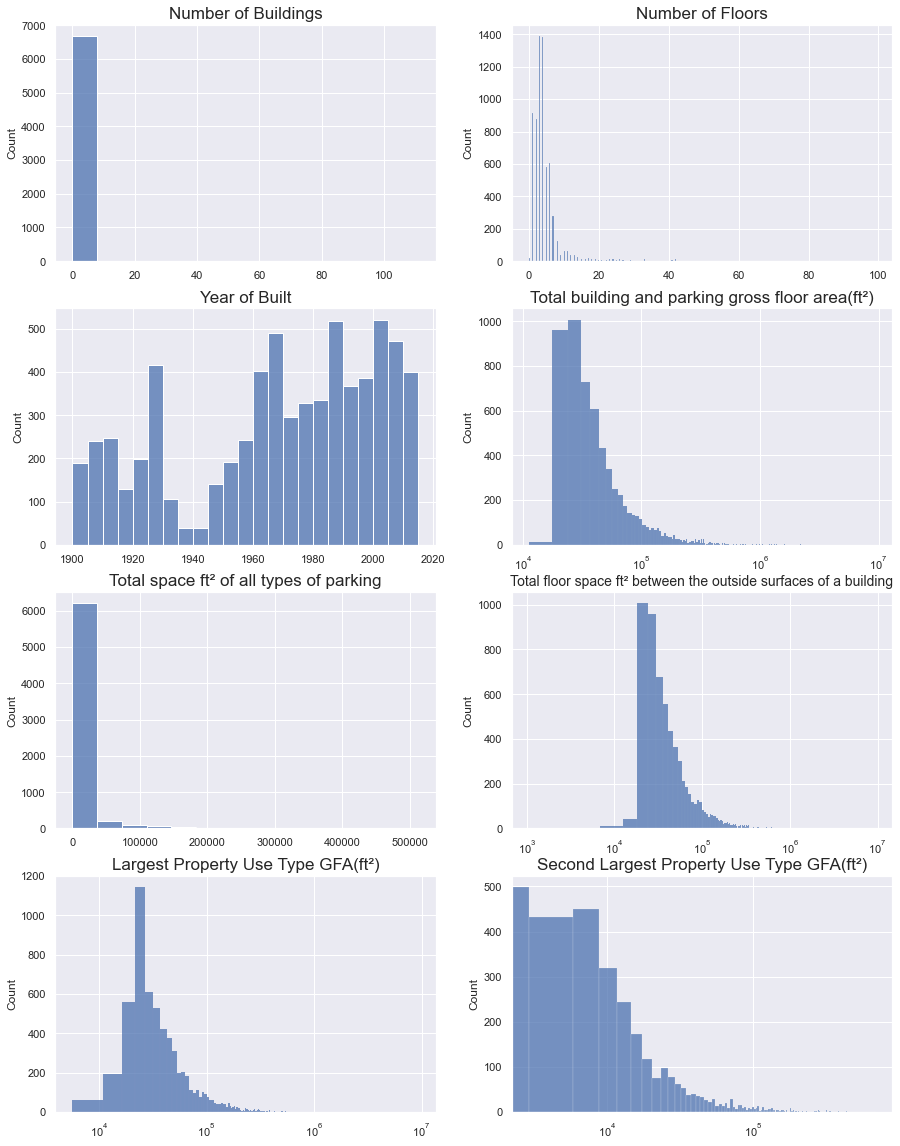

In [35]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,20))

plt.subplot(4,2,3)
sns.histplot(x="YearBuilt", data=data)
plt.title("Year of Built", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,1)
sns.histplot(x="NumberofBuildings", data=data)
plt.title("Number of Buildings", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,2)
sns.histplot(x="NumberofFloors", data=data)
plt.title("Number of Floors", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,8)
sns.histplot(x="SecondLargestPropertyUseTypeGFA", data=data)
plt.xscale('log')
plt.title("Second Largest Property Use Type GFA(ft²)", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,5)
sns.histplot(x="PropertyGFAParking", data=data)
plt.title("Total space ft² of all types of parking", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,6)
sns.histplot(x="PropertyGFABuilding(s)", data=data)
plt.xscale('log')
plt.title("Total floor space ft² between the outside surfaces of a building", fontsize=14)
plt.xlabel("")

plt.subplot(4,2,7)
sns.histplot(x="LargestPropertyUseTypeGFA", data=data)
plt.xscale('log')
plt.title("Largest Property Use Type GFA(ft²)", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,4)
sns.histplot(x="PropertyGFATotal", data=data)
plt.xscale('log')
plt.title("Total building and parking gross floor area(ft²)", fontsize=17)
plt.xlabel("")

#### Energy visualization

Text(0.5, 0, '')

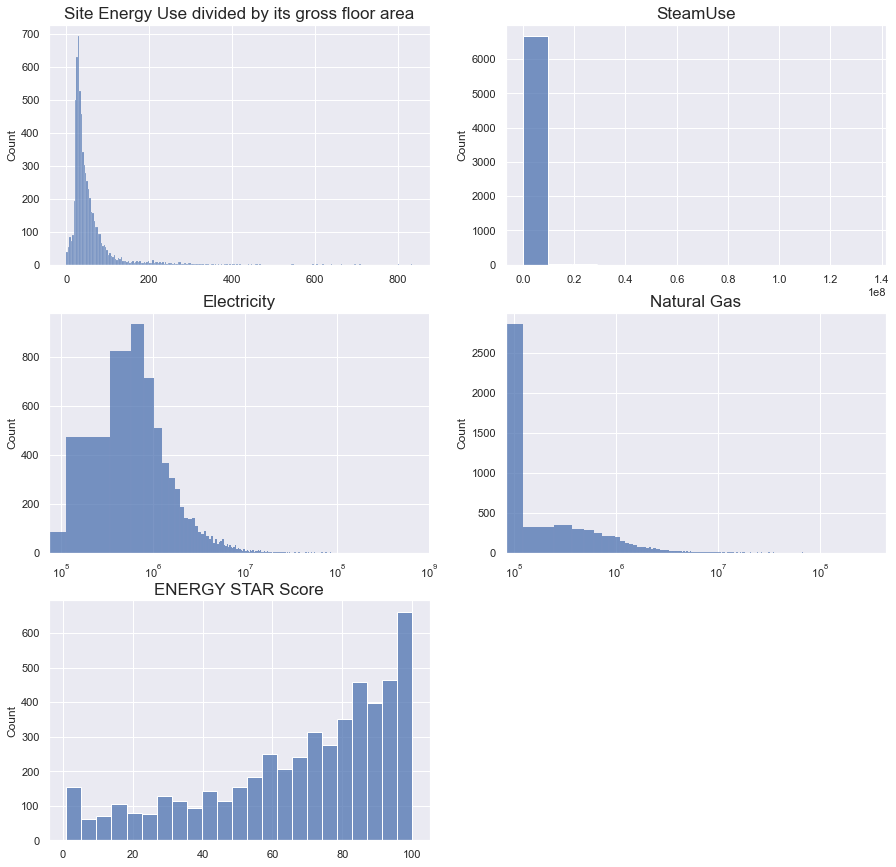

In [36]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.histplot(x="SiteEUI(kBtu/sf)", data=data)
plt.title("Site Energy Use divided by its gross floor area", fontsize=17)
plt.xlabel("")

plt.subplot(3,2,2)
sns.histplot(x="SteamUse(kBtu)", data=data)
plt.title("SteamUse", fontsize=17)
plt.xlabel("")

plt.subplot(3,2,3)
sns.histplot(x="Electricity(kBtu)", data=data)
plt.xscale('log')
plt.title("Electricity", fontsize=17)
plt.xlabel("")

plt.subplot(3,2,4)
sns.histplot(x="NaturalGas(kBtu)", data=data)
plt.xscale('log')
plt.title("Natural Gas", fontsize=17)
plt.xlabel("")

#An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to 
#control for differences among climate, building uses, and operations. A score of 50 represents the national median.
plt.subplot(3,2,5)
sns.histplot(x="ENERGYSTARScore", data=data)
plt.title("ENERGY STAR Score", fontsize=17)
plt.xlabel("")

### CO2 & Energy

Text(0.5, 0, '')

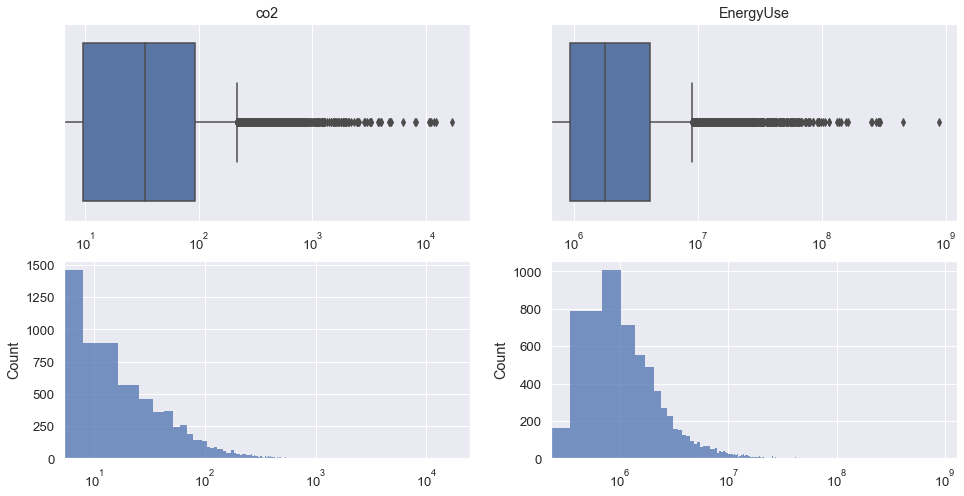

In [37]:
sns.set(font_scale=1.2)
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(data=data, x="TotalGHGEmissions")
plt.xscale('log')
plt.xlabel("")
plt.title("co2")

plt.subplot(2,2,2)
sns.boxplot(data=data, x="SiteEnergyUse(kBtu)")
plt.xscale('log')
plt.xlabel("")
plt.title("EnergyUse")

plt.subplot(2,2,3)
sns.histplot(data=data, x="TotalGHGEmissions")
plt.xscale('log')
plt.xlabel("")

plt.subplot(2,2,4)
sns.histplot(data=data, x="SiteEnergyUse(kBtu)")
plt.xscale('log')
plt.xlabel("")

Text(0.5, 0.98, "Répartition des données de consommation d'énergie vs emissions de CO2")

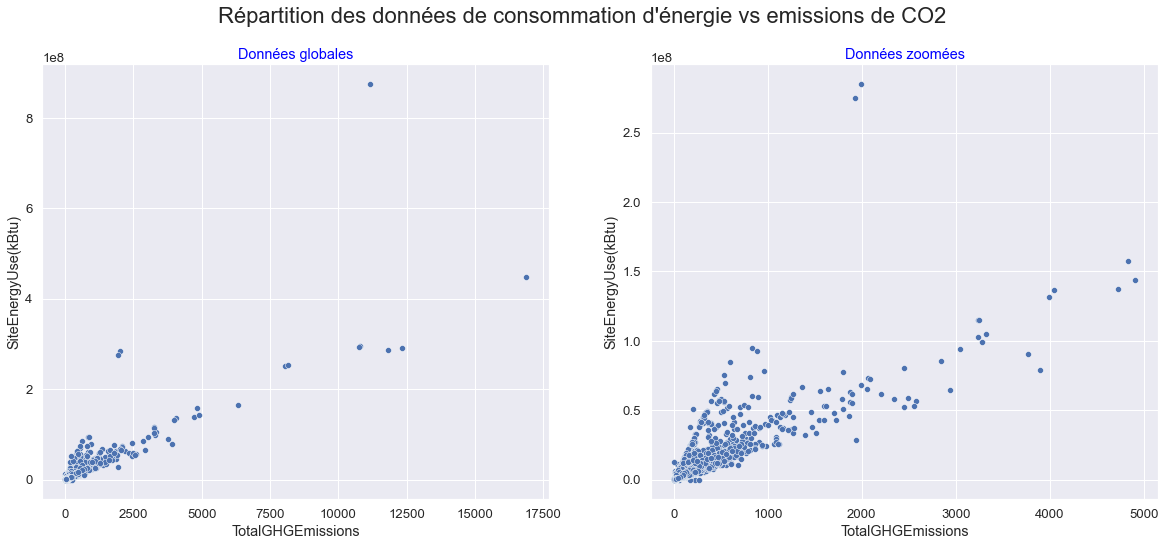

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='blue')
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='blue')
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2", fontsize=22)


#### Matrics de corrolation

<ipython-input-42-f099a350d375>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


(0.0, 23.0)

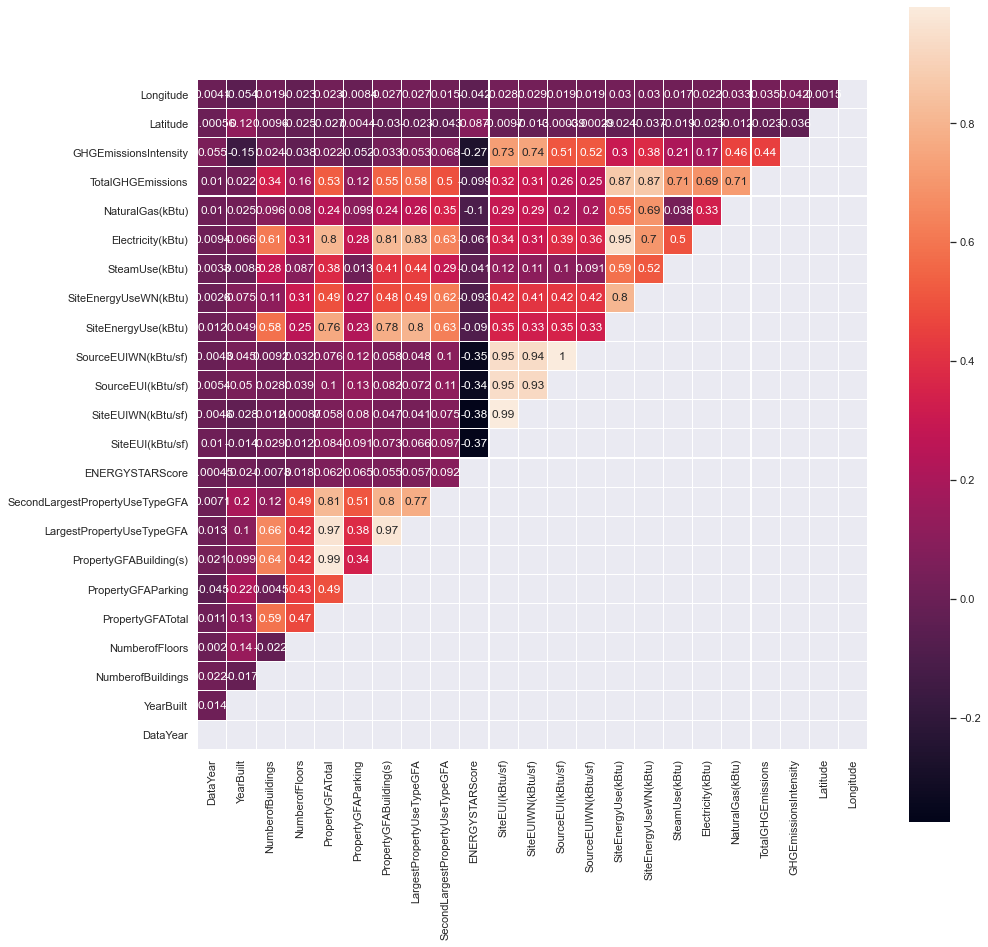

In [42]:
sns.set(font_scale=1.0)
corr_matrix = data.corr()
fig = plt.figure(1, figsize=(15, 15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, linewidths=0.1, annot=True)
plt.xlim(0, corr_matrix.shape[1])
plt.ylim(0, corr_matrix.shape[0])


- Le "DataYear" est fortement corrélée à la "ZipCode".
- Le 'SourceEUIWN(kBtu/sf)' est fortement corrélée à les 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)'.

- La consommation totale d'énergie "Electricity(kBtu)" est fortement corrélée à la surface des bâtiments "PropertyGFABuilding(s)", "PropertyGFATotal" & "LargestPropertyUseTypeGFA".
- Les émissions de Co2 sont fortement corrélées à la consommation totale d'énergie

donc supprimées pour éviter la redondance d'informations

In [37]:
data= data.drop(columns=['SourceEUIWN(kBtu/sf)','SiteEUIWN(kBtu/sf)','PropertyGFATotal',
                      'SourceEUI(kBtu/sf)','SecondLargestPropertyUseTypeGFA','Electricity(kBtu)',
                      'GHGEmissionsIntensity','SiteEnergyUseWN(kBtu)','LargestPropertyUseTypeGFA'])

<ipython-input-44-e6720383f84a>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


(0.0, 14.0)

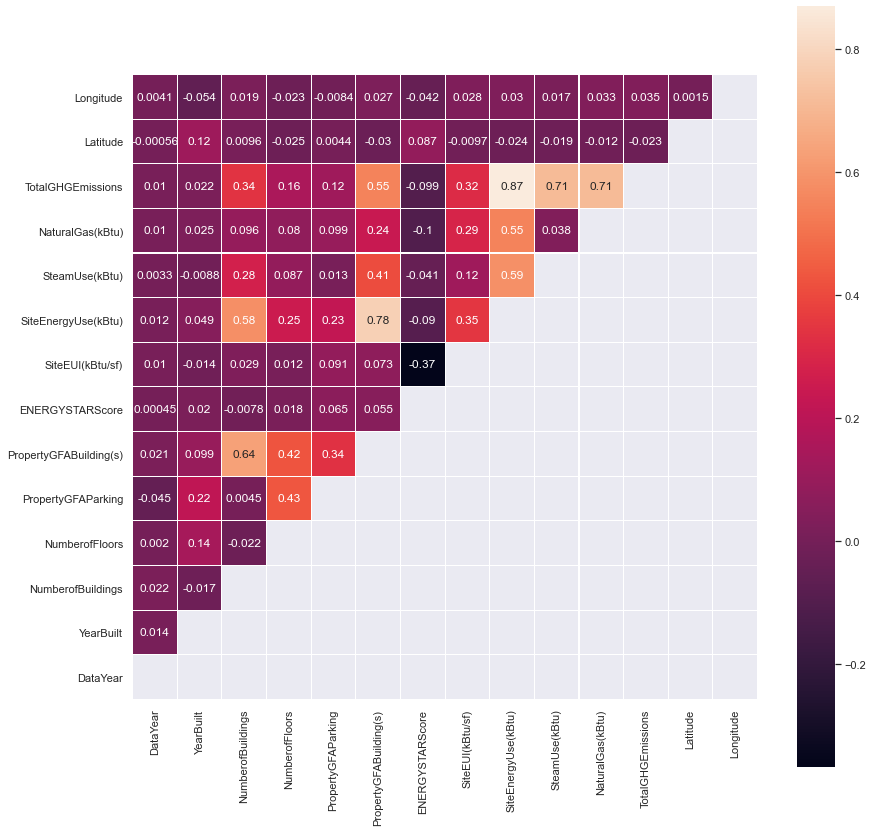

In [44]:
sns.set(font_scale=1.0)
corr_matrix = data.corr()
fig = plt.figure(1, figsize=(14, 14))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, linewidths=0.1, annot=True)
plt.xlim(0, corr_matrix.shape[1])
plt.ylim(0, corr_matrix.shape[0])


### Data Exploration- Qualitative

In [38]:
# Les colonnes object dtypes sont séléctionnés
cat_var = list(data.select_dtypes(include=['object', 'bool']).columns)

In [39]:
print("Les variables catégorielles sont les suivantes : \n")
for categ in cat_var :
    print(categ, ":", data[categ].nunique())

Les variables catégorielles sont les suivantes : 

BuildingType : 8
PrimaryPropertyType : 32
Neighborhood : 19
ListOfAllPropertyUseTypes : 488
LargestPropertyUseType : 57
SecondLargestPropertyUseType : 50


In [40]:
data=data.drop(columns=["ListOfAllPropertyUseTypes"])

In [41]:
data.shape

(6697, 19)

Text(0.5, 1.0, 'Neighborhood')

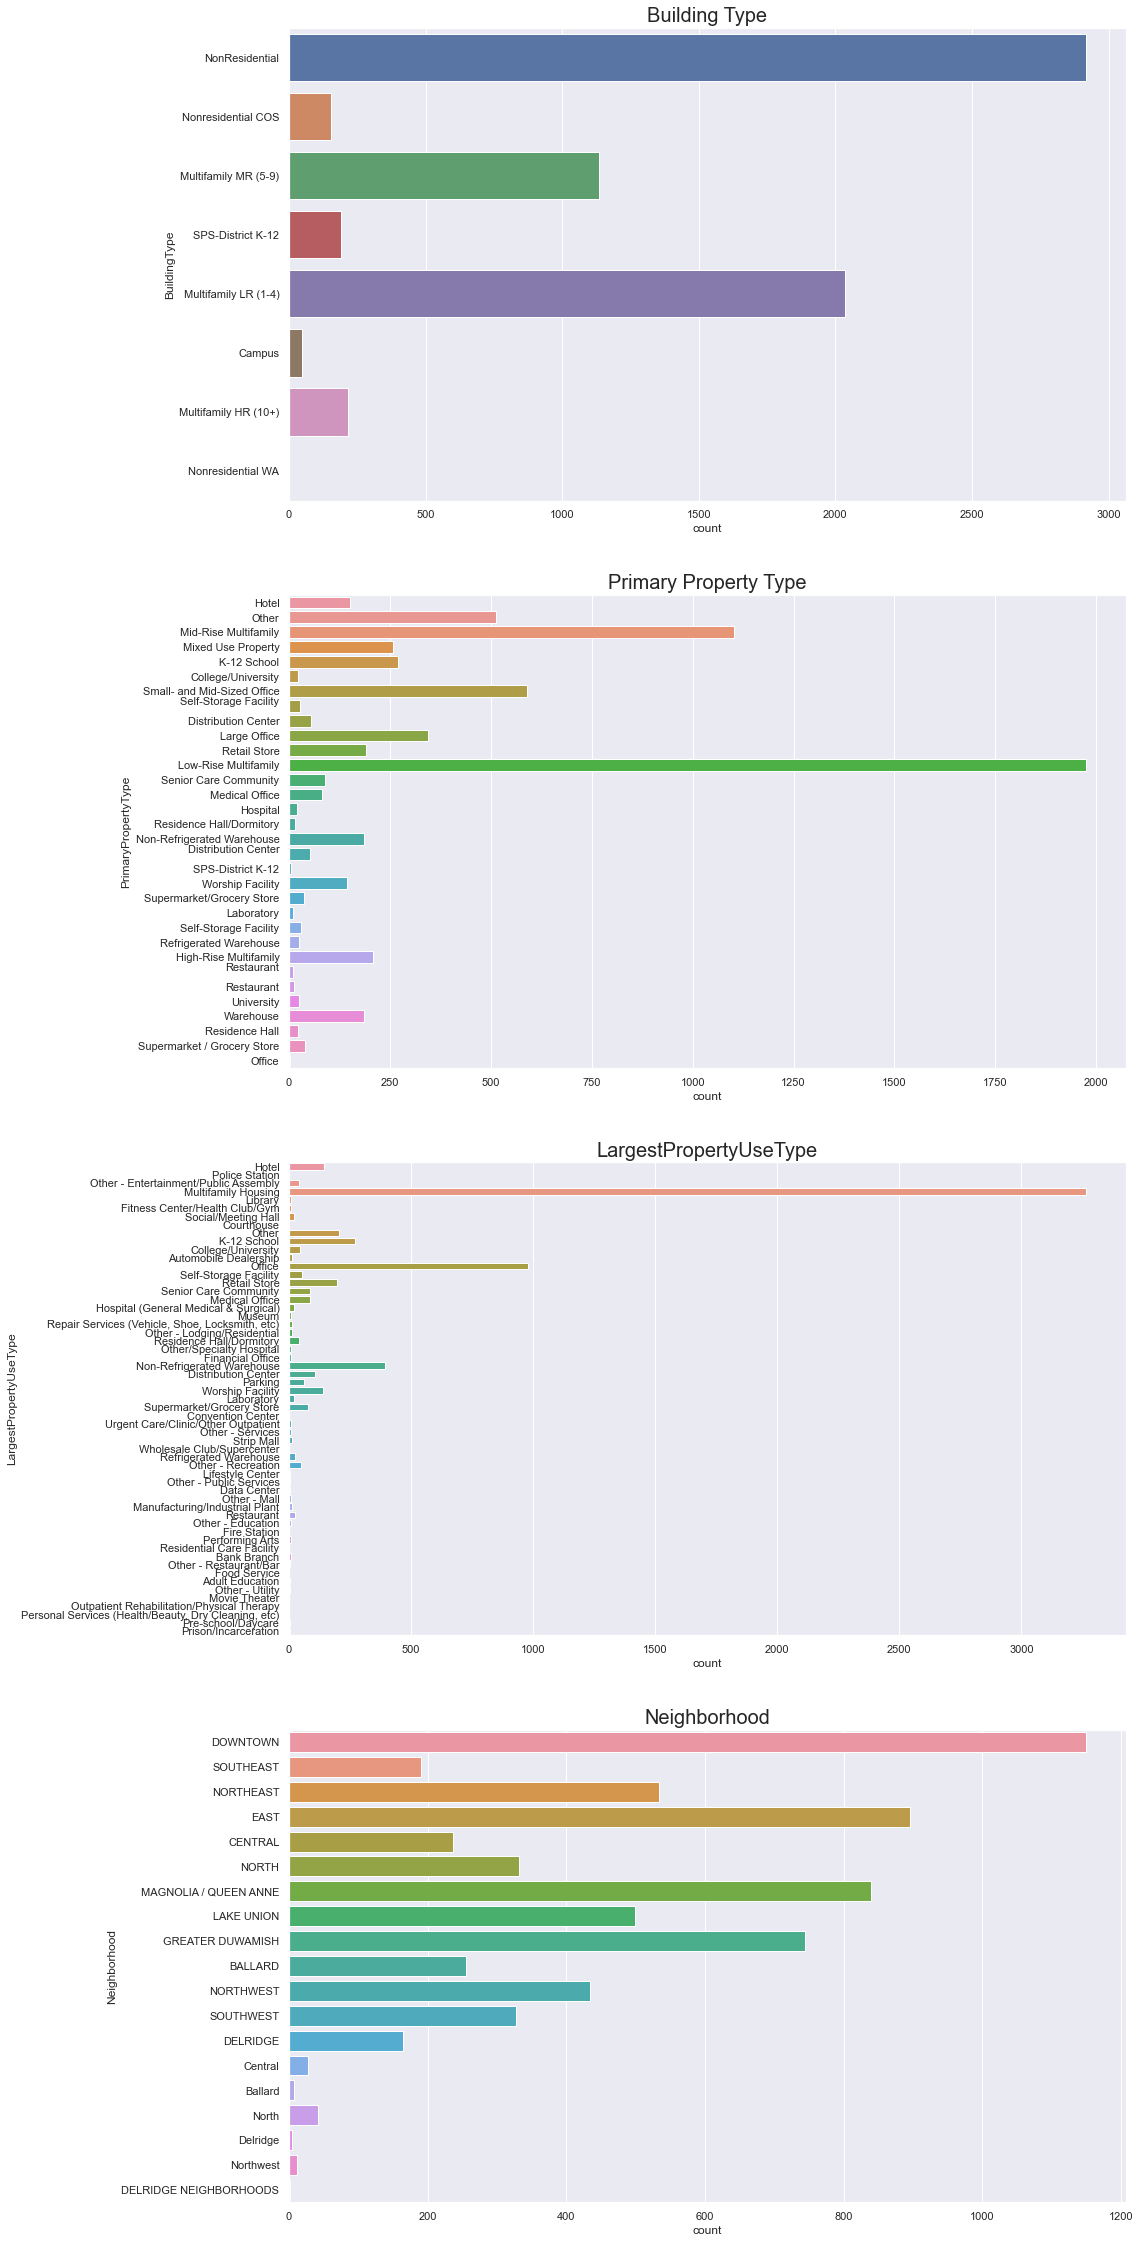

In [53]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,40))

plt.subplot(4,1,1)
sns.countplot(y="BuildingType", data=data)
plt.title("Building Type", fontsize=20)

plt.subplot(4,1,2)
sns.countplot(y="PrimaryPropertyType", data=data)
plt.title("Primary Property Type", fontsize=20)

plt.subplot(4,1,3)
sns.countplot(y="LargestPropertyUseType", data=data)
plt.title("LargestPropertyUseType", fontsize=20)
plt.subplot(4,1,4)
sns.countplot(y="Neighborhood", data=data)
plt.title("Neighborhood", fontsize=20)


## 3. Préparation des données

### objectif : émissions des bâtiments non destinés à l’habitation.

In [55]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude
0,2015,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,0,88434,Hotel,NaN,65.0,78.9,6981428.0,2023032.0,1272388.0,249.43,47.612190,-122.337997
1,2015,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,15064,88502,Hotel,Parking,51.0,94.4,8354235.0,0.0,4448985.0,263.51,47.613106,-122.333358
2,2015,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,0,961990,Hotel,Parking,18.0,96.6,73130656.0,19660404.0,3709900.0,2061.48,47.613349,-122.337699
3,2015,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,0,61320,Hotel,NaN,1.0,460.4,28229320.0,23458518.0,2001894.0,1936.34,47.614216,-122.336609
4,2015,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,12460,107430,Hotel,Parking,67.0,120.1,14829099.0,0.0,8763105.0,507.70,47.613754,-122.340924


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DataYear                      6697 non-null   int64  
 1   BuildingType                  6697 non-null   object 
 2   PrimaryPropertyType           6697 non-null   object 
 3   Neighborhood                  6697 non-null   object 
 4   YearBuilt                     6697 non-null   int64  
 5   NumberofBuildings             6697 non-null   float64
 6   NumberofFloors                6689 non-null   float64
 7   PropertyGFAParking            6697 non-null   int64  
 8   PropertyGFABuilding(s)        6697 non-null   int64  
 9   LargestPropertyUseType        6553 non-null   object 
 10  SecondLargestPropertyUseType  3237 non-null   object 
 11  ENERGYSTARScore               5093 non-null   float64
 12  SiteEUI(kBtu/sf)              6695 non-null   float64
 13  Sit

In [57]:
# Nombre d'occurences par 'BuildingType'
data["BuildingType"].value_counts()

NonResidential          2918
Multifamily LR (1-4)    2037
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        191
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

#### Non-résident

In [42]:
categories_to_keep = ['NonResidential', 'SPS-District K-12', 'Nonresidential COS','Nonresidential WA','Campus']
data = data[data.BuildingType.isin(categories_to_keep)]
data.shape

(3309, 19)

Text(0.5, 1.0, 'Building Type')

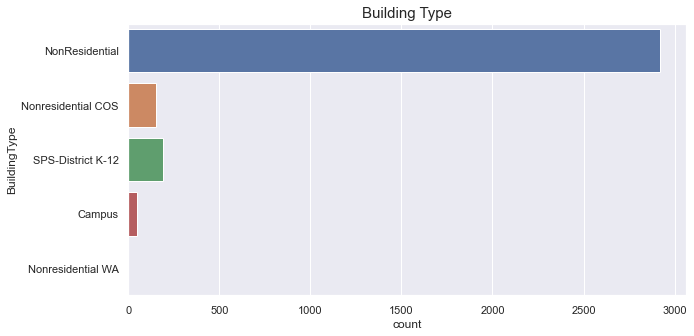

In [59]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,5))

sns.countplot(y="BuildingType",  data=data)
plt.title("Building Type", fontsize=15)

Text(0.5, 0.98, "Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment")

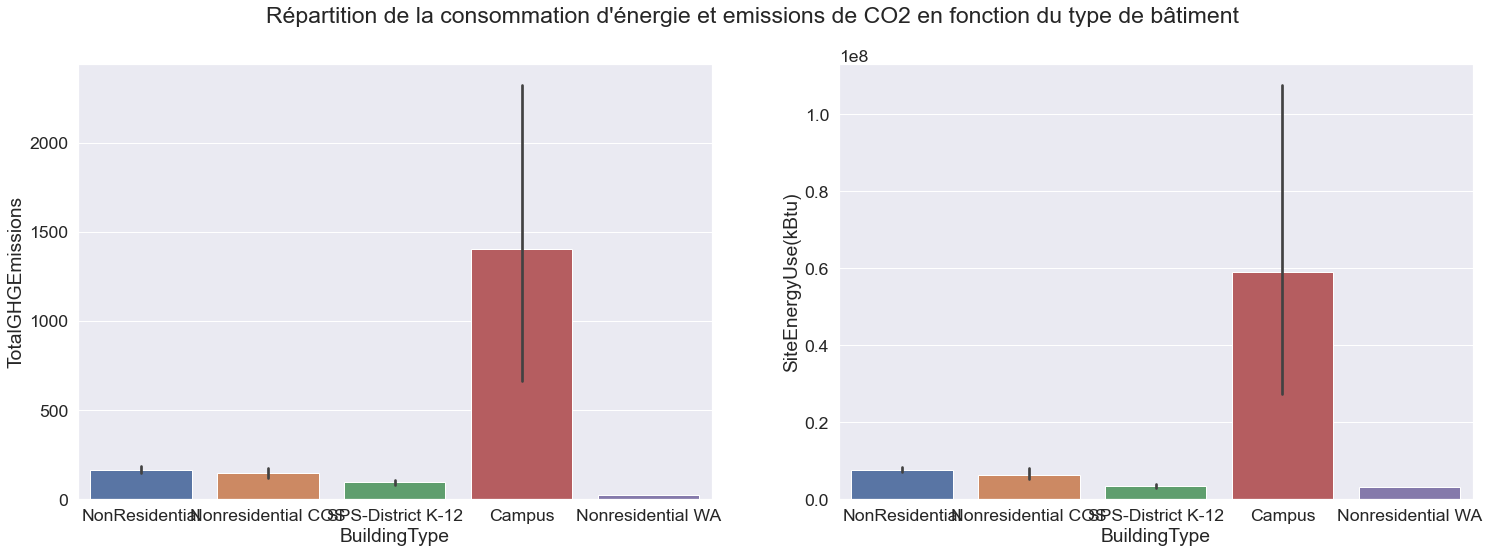

In [60]:
sns.set(font_scale=1.6)
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(25,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment")

### Grouping operations

In [61]:
# Nombre d'occurences par 'PrimaryPropertyType'
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    587
Other                          502
Large Office                   344
K-12 School                    269
Mixed Use Property             219
Retail Store                   191
Warehouse                      187
Non-Refrigerated Warehouse     187
Hotel                          149
Worship Facility               143
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
Residence Hall                  21
College/University              21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      13
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             5
SPS-District K-12   

In [43]:
# Suppresion de Low-Rise Multifamily & Residence Hall/Dormitory
data = data.loc[~data["PrimaryPropertyType"].isin(["Low-Rise Multifamily"])]
data = data.loc[~data["PrimaryPropertyType"].isin(["Residence Hall/Dormitory"])]

In [44]:
# Renommage de les valeur en "PrimaryPropertyType"
data.loc[data["PrimaryPropertyType"] == "Restaurant\n", "PrimaryPropertyType"] = "Restaurant"
data.loc[data["PrimaryPropertyType"] == "Self-Storage Facility\n", "PrimaryPropertyType"] = "Self-Storage Facility"

data.loc[data["PrimaryPropertyType"] == "Distribution Center\n", "PrimaryPropertyType"] = "Distribution Center"
data.loc[data["PrimaryPropertyType"] == "Supermarket / Grocery Store", "PrimaryPropertyType"] = "Supermarket/Grocery Store"

data.loc[data["PrimaryPropertyType"] == "University", "PrimaryPropertyType"] = "College/University"
data.loc[data["PrimaryPropertyType"] == "Non-Refrigerated Warehouse", "PrimaryPropertyType"] = "Warehouse"

data.loc[data["PrimaryPropertyType"] == "Office", "PrimaryPropertyType"] = "Small- and Mid-Sized Office"
data.loc[data["PrimaryPropertyType"] == "SPS-District K-12", "PrimaryPropertyType"] = "K-12 School"

In [64]:
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    590
Other                          502
Warehouse                      374
Large Office                   344
K-12 School                    273
Mixed Use Property             219
Retail Store                   191
Hotel                          149
Worship Facility               143
Distribution Center            106
Medical Office                  82
Supermarket/Grocery Store       76
Self-Storage Facility           56
College/University              45
Senior Care Community           39
Refrigerated Warehouse          25
Restaurant                      23
Residence Hall                  21
Hospital                        20
Laboratory                      11
Name: PrimaryPropertyType, dtype: int64

In [34]:
data.shape

(3289, 19)

C:\Users\azade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

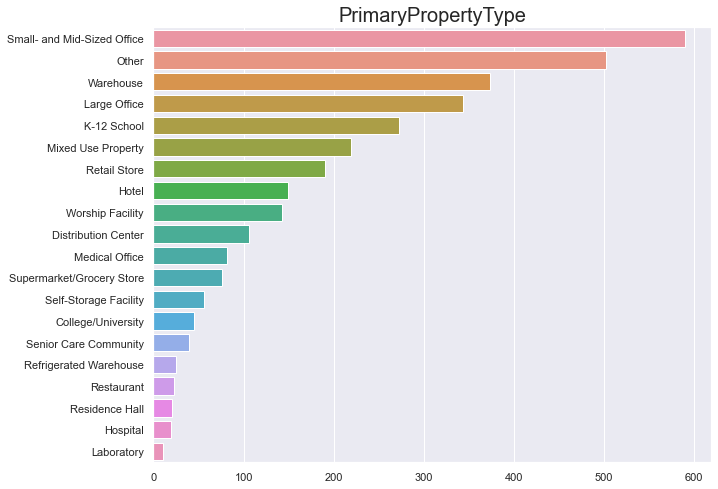

In [67]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))

df = data['PrimaryPropertyType'].value_counts()
sns.barplot(df.values, df.index)
plt.title("PrimaryPropertyType", fontsize=20)
plt.xlabel('')
plt.ylabel('')

Text(0.5, 0.98, "Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de PrimaryPropertyType")

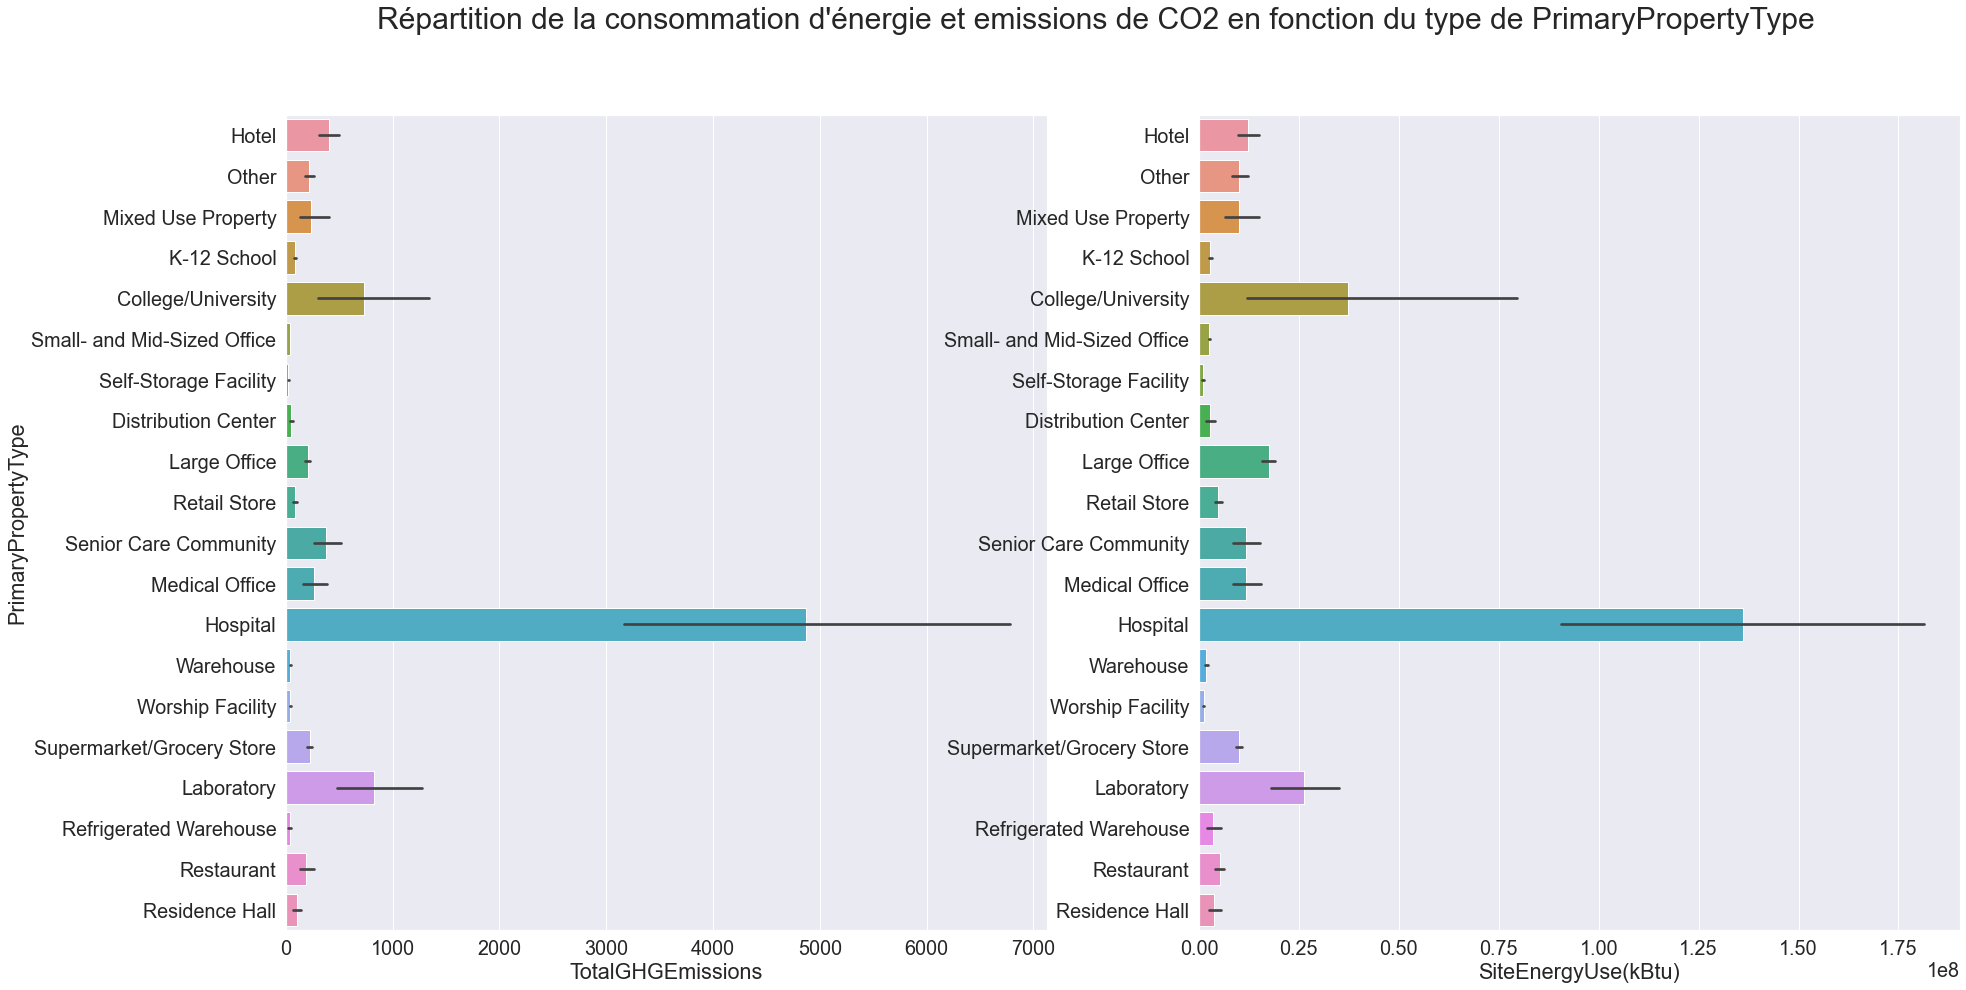

In [66]:
sns.set(font_scale=1.8)
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(30,15))
sns.barplot(y='PrimaryPropertyType',x='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(y='PrimaryPropertyType',x='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.ylabel('')
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de PrimaryPropertyType", 
              fontsize=30)

#### Largest Property Use Type

In [68]:
data["LargestPropertyUseType"].value_counts()

Office                                                  975
Non-Refrigerated Warehouse                              393
K-12 School                                             269
Retail Store                                            198
Other                                                   198
Hotel                                                   144
Worship Facility                                        141
Distribution Center                                     106
Medical Office                                           84
Supermarket/Grocery Store                                78
Parking                                                  56
Self-Storage Facility                                    54
Other - Recreation                                       51
College/University                                       44
Other - Entertainment/Public Assembly                    41
Senior Care Community                                    39
Refrigerated Warehouse                  

In [45]:
# Suppresion de residentiel
data = data.loc[~data["LargestPropertyUseType"].isin(["Residential Care Facility"])]
data = data.loc[~data["LargestPropertyUseType"].isin(["Residence Hall/Dormitory"])]
#data = data.loc[~data["LargestPropertyUseType"].isin(["Outpatient Rehabilitation/Physical Therapy"])]

In [46]:
# Renommage de les valeur en "PrimaryPropertyType"
data.loc[data["LargestPropertyUseType"] == "Police Station", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Fire Station", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Courthouse", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Residential Care Facility", "LargestPropertyUseType"] = "Senior Care Community"

data.loc[data["LargestPropertyUseType"] == "Pre-school/Daycare", "LargestPropertyUseType"] = "K-12 School"

data.loc[data["LargestPropertyUseType"] == "Food Service", "LargestPropertyUseType"] = "Other - Restaurant/Bar"
data.loc[data["LargestPropertyUseType"] == "Adult Education", "LargestPropertyUseType"] = "College/University"

data.loc[data["LargestPropertyUseType"] == "Lifestyle Center", "LargestPropertyUseType"] = "Other - Mall"
data.loc[data["LargestPropertyUseType"] == "Movie Theater", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"

data.loc[data["LargestPropertyUseType"] == "Bank Branch", "LargestPropertyUseType"] = "Financial Office"
data.loc[data["LargestPropertyUseType"] == "Personal Services (Health/Beauty, Dry Cleaning, etc)", "LargestPropertyUseType"] = "Other/Specialty Hospital"
data.loc[data["LargestPropertyUseType"] == "Wholesale Club/Supercenter", "LargestPropertyUseType"] = "Distribution Center"
data.loc[data["LargestPropertyUseType"] == "Convention Center", "LargestPropertyUseType"] = "Social/Meeting Hall"

data.loc[data["LargestPropertyUseType"] == "Urgent Care/Clinic/Other Outpatient", "LargestPropertyUseType"] = "Medical Office"
data.loc[data["LargestPropertyUseType"] == "Other - Restaurant/Bar", "LargestPropertyUseType"] = "Restaurant"
data.loc[data["LargestPropertyUseType"] == "Other - Utility", "LargestPropertyUseType"] = "Other - Services"

data.loc[data["LargestPropertyUseType"] == "Performing Arts", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"
data.loc[data["LargestPropertyUseType"] == "Data Center", "LargestPropertyUseType"] = "Office"

data.loc[data["LargestPropertyUseType"] == "Library", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Museum", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"
data.loc[data["LargestPropertyUseType"] == "Fitness Center/Health Club/Gym", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"

data.loc[data["LargestPropertyUseType"] == "Prison/Incarceration", "LargestPropertyUseType"] = "Other - Public Services"

data.loc[data["LargestPropertyUseType"] == "Other - Education", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Fire Station", "LargestPropertyUseType"] = "Other - Public Services"

data.loc[data["LargestPropertyUseType"] == "Outpatient Rehabilitation/Physical Therapy", "LargestPropertyUseType"] = "Other/Specialty Hospital"

C:\Users\azade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'LargestPropertyUseType')

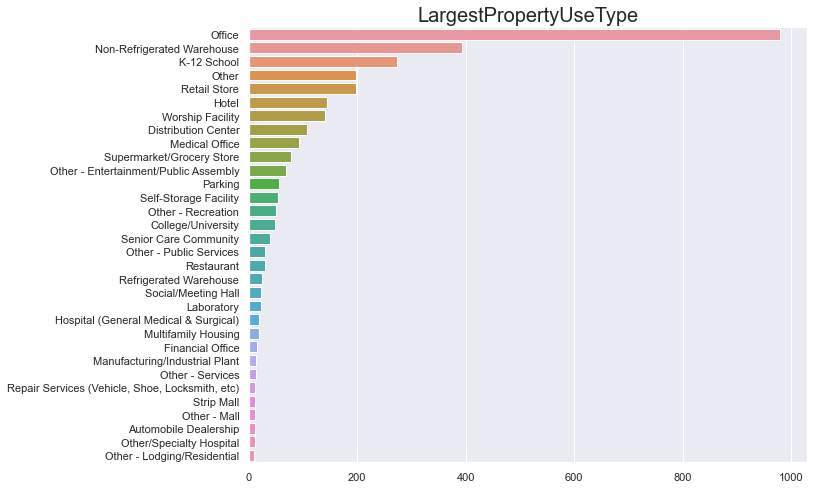

In [71]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))

df = data['LargestPropertyUseType'].value_counts()
sns.barplot(df.values, df.index)
plt.title("LargestPropertyUseType", fontsize=20)

In [37]:
data.shape


(3264, 19)

Text(0.5, 0.98, "Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de PrimaryPropertyType")

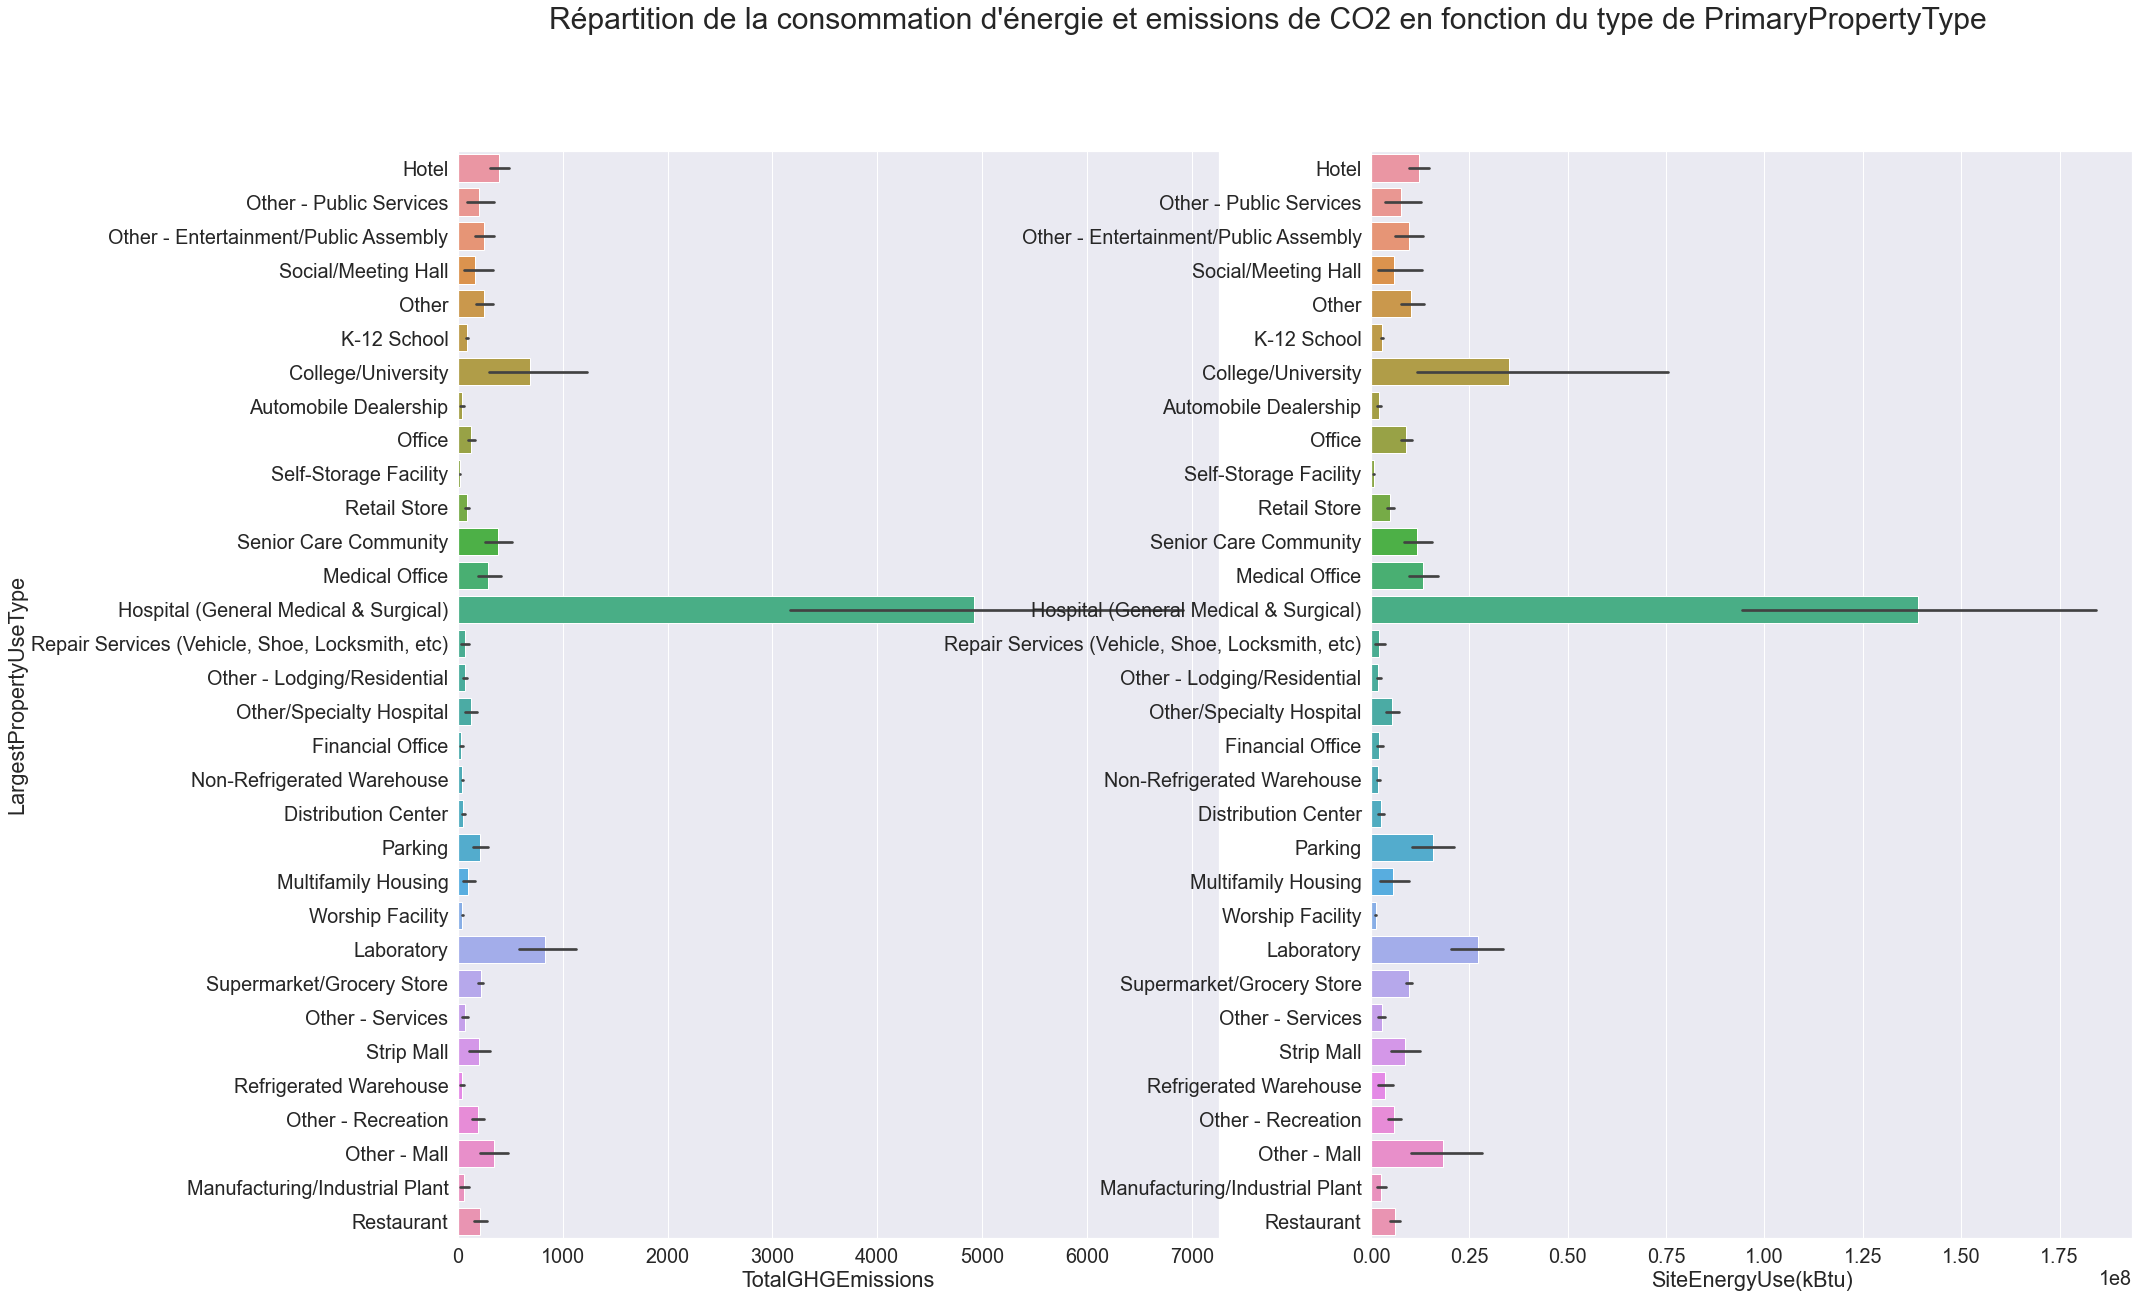

In [73]:
sns.set(font_scale=1.8)
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(30,20))
sns.barplot(y='LargestPropertyUseType',x='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(y='LargestPropertyUseType',x='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.ylabel('')
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de PrimaryPropertyType", 
              fontsize=30)

#### "PrimaryPropertyType" & 'LargestPropertyUseType ' like the same so keepind"PrimaryPropertyType"

In [47]:
data.drop(['LargestPropertyUseType'],axis=1, inplace =True)

In [48]:
data["Neighborhood"].value_counts()

DOWNTOWN                  719
GREATER DUWAMISH          686
MAGNOLIA / QUEEN ANNE     297
LAKE UNION                292
EAST                      236
NORTHEAST                 219
NORTHWEST                 166
BALLARD                   133
NORTH                     122
CENTRAL                   104
SOUTHEAST                  92
DELRIDGE                   87
SOUTHWEST                  81
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [49]:
# Renommage de les valeur en "Neighborhood"
data.loc[data["Neighborhood"] == "DELRIDGE NEIGHBORHOODS", "Neighborhood"] = "DELRIDGE"
data.loc[data["Neighborhood"] == "Central", "Neighborhood"] = "CENTRAL"
data.loc[data["Neighborhood"] == "Ballard", "Neighborhood"] = "BALLARD"
data.loc[data["Neighborhood"] == "Northwest", "Neighborhood"] = "NORTHWEST"
data.loc[data["Neighborhood"] == "North", "Neighborhood"] = "NORTH"
data.loc[data["Neighborhood"] == "Delridge", "Neighborhood"] = "DELRIDGE"

C:\Users\azade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighborhood')

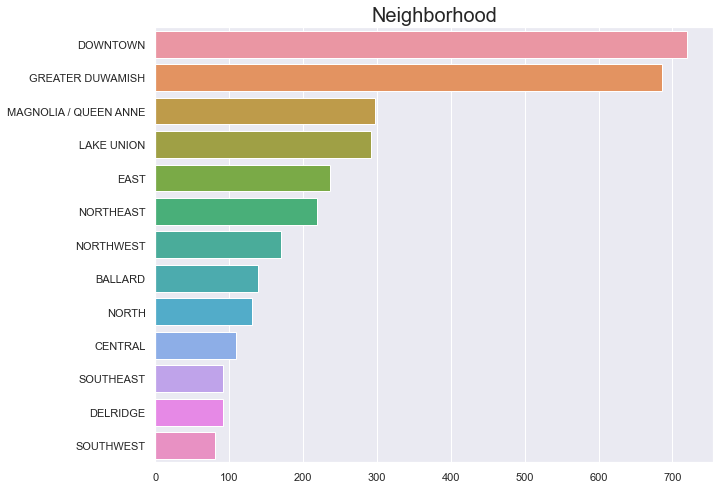

In [58]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))

df = data['Neighborhood'].value_counts()
sns.barplot(df.values, df.index)
plt.title("Neighborhood", fontsize=20)

Text(0.5, 0.98, "Répartition de la consommation d'énergie et emissions de CO2 en fonction de la quartier")

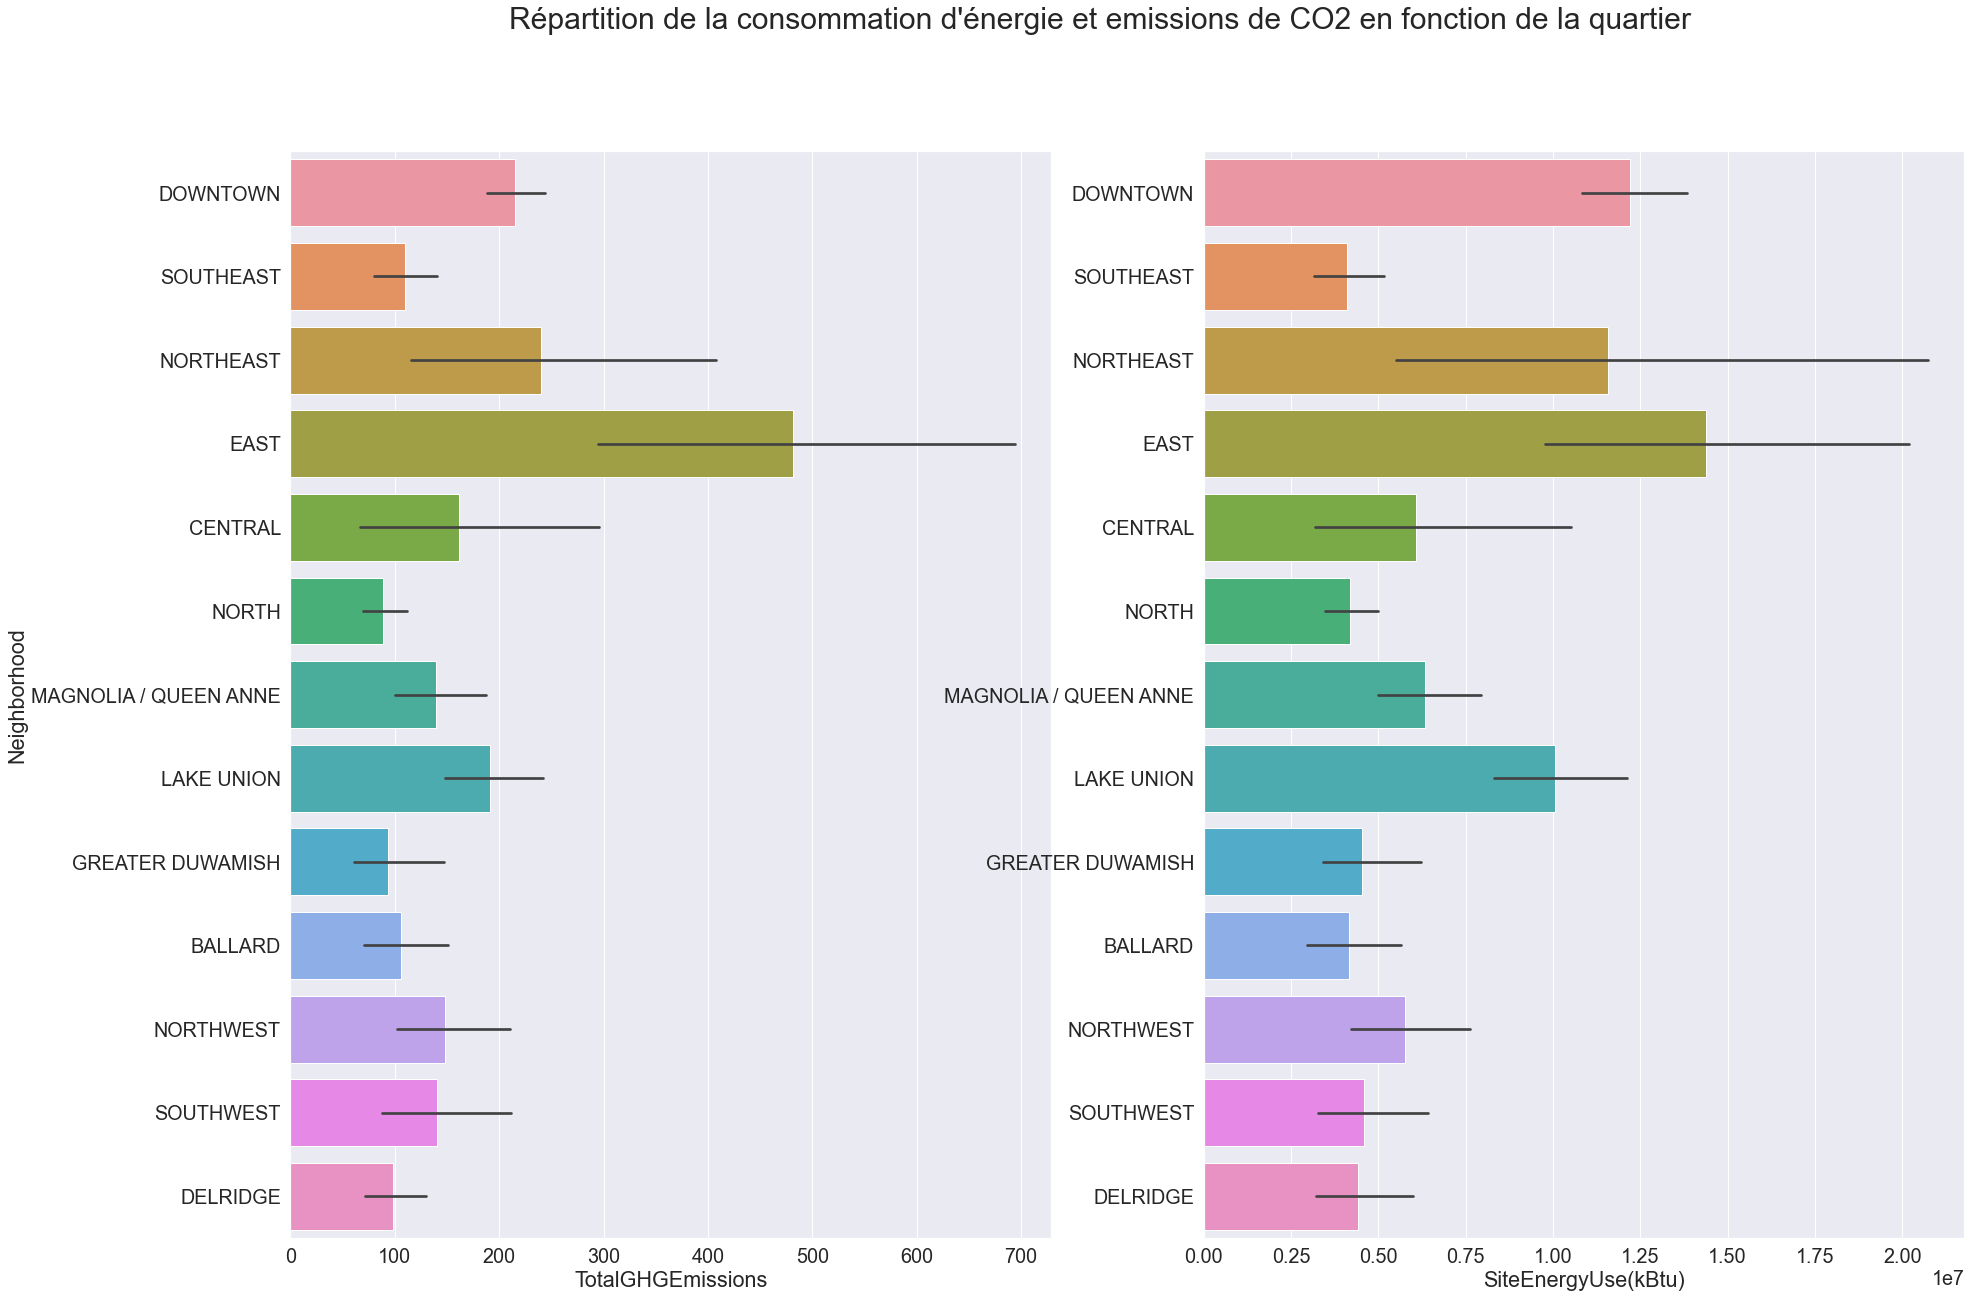

In [57]:
sns.set(font_scale=1.8)
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(30,20))
sns.barplot(y='Neighborhood',x='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(y='Neighborhood',x='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.ylabel('')
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction de la quartier", 
              fontsize=30)

### Data Leakage

Il faut supprimer les données de relevés d'énergie (électricité, gaz...) car c'est une fuite de données (data leakage)

In [62]:
data.keys()

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'Latitude',
       'Longitude'],
      dtype='object')

In [50]:
data.drop(['SiteEUI(kBtu/sf)','SteamUse(kBtu)', 'NaturalGas(kBtu)'], axis=1, inplace= True)

### Valeurs aberrantes

#### Box plot

<AxesSubplot:>

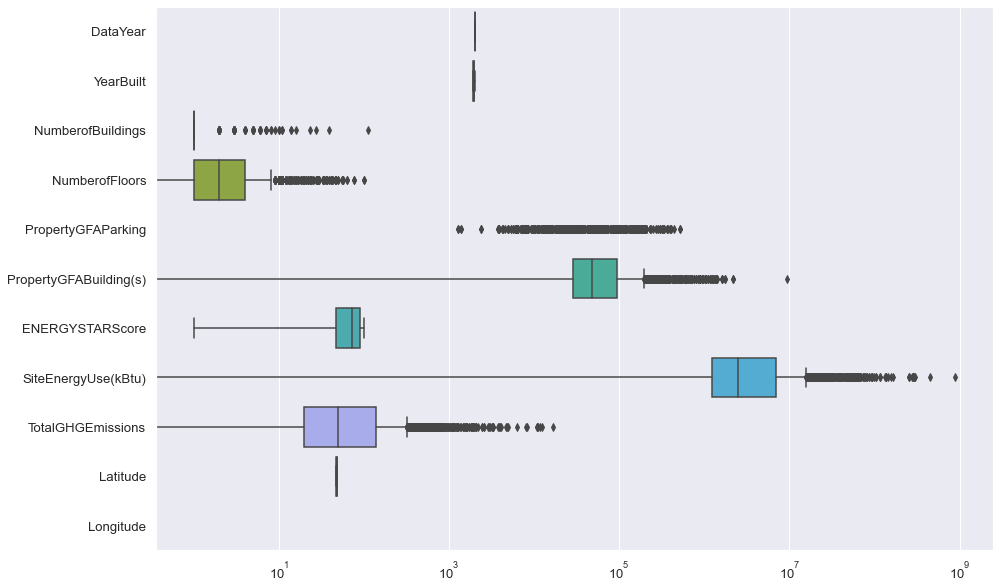

In [103]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
plt.xscale('log')
sns.boxplot(data=data,  orient="h")

Text(0.5, 1.0, "Consommations d'énergie par surface de bâtiment et type de bâtiment\n")

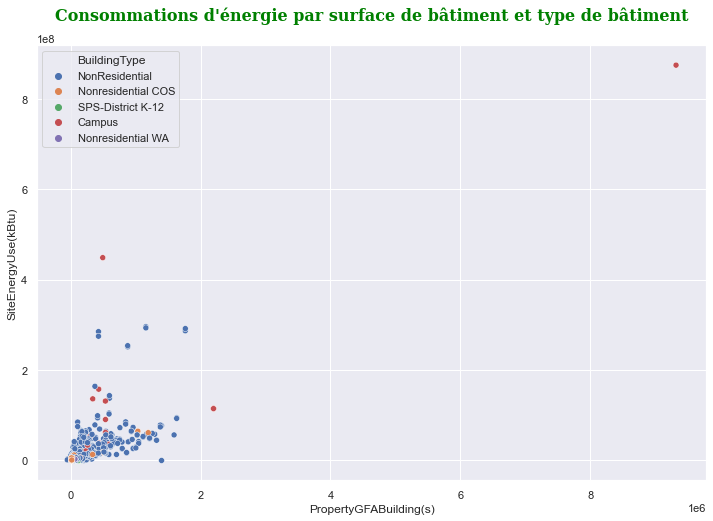

In [61]:
font_title = {'family': 'serif', 'color':'green','weight': 'bold','size': 14}

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFABuilding(s)', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface de bâtiment et type de bâtiment\n", 
          fontdict=font_title, fontsize=16)

Text(0.5, 1.0, "Consommations d'énergie par surface de Parking et type de bâtiment\n")

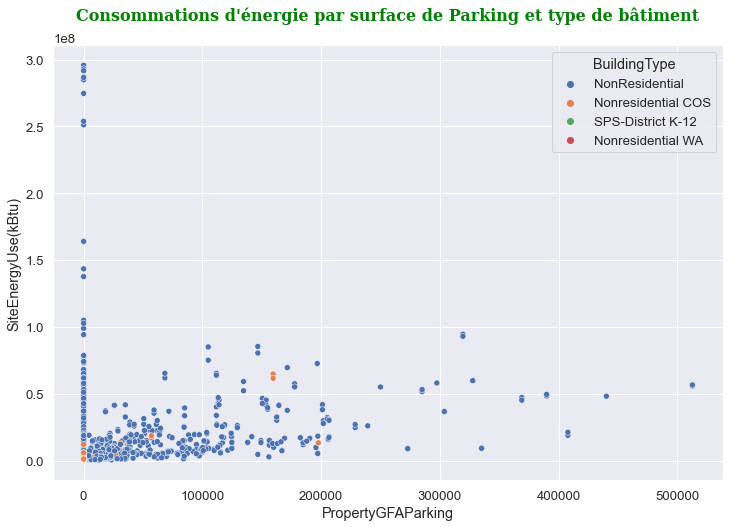

In [264]:
font_title = {'family': 'serif', 'color':'green','weight': 'bold','size': 14}
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFAParking', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface de Parking et type de bâtiment\n", 
          fontdict=font_title, fontsize=16)

Text(0.5, 1.0, "Consommations d'énergie en fonction de la quartier et type de bâtiment\n")

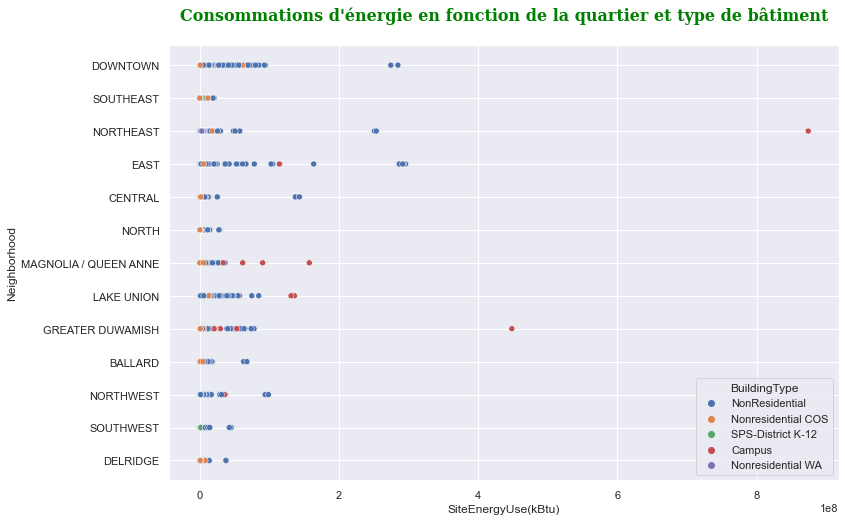

In [62]:
font_title = {'family': 'serif', 'color':'green','weight': 'bold','size': 14}
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, y='Neighborhood', x='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie en fonction de la quartier et type de bâtiment\n", 
          fontdict=font_title, fontsize=16)

In [86]:
data.describe()

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
count,3264.000000,3264.000000,3264.000000,3256.000000,3264.000000,3.264000e+03,2178.000000,3.264000e+03,3264.000000,3264.000000,3264.000000
mean,2015.502451,1961.636642,1.119792,4.136057,13463.986826,1.031731e+05,64.851699,8.136796e+06,178.331786,47.615573,-122.333174
std,0.500071,32.678736,2.237244,6.610812,43918.521313,2.358556e+05,28.590074,2.541927e+07,670.852000,0.048147,0.024576
min,2015.000000,1900.000000,0.000000,0.000000,-2.000000,-5.055000e+04,1.000000,0.000000e+00,-0.800000,47.499170,-122.411820
25%,2015.000000,1930.000000,1.000000,1.000000,0.000000,2.858550e+04,47.000000,1.219834e+06,19.697500,47.585050,-122.343513
50%,2016.000000,1965.000000,1.000000,2.000000,0.000000,4.763750e+04,72.500000,2.515115e+06,49.060000,47.612150,-122.333146
75%,2016.000000,1989.000000,1.000000,4.000000,0.000000,9.455325e+04,89.000000,6.992292e+06,139.217500,47.648642,-122.322110
max,2016.000000,2015.000000,111.000000,99.000000,512608.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,47.733870,-122.258640


#### Trouver des valeurs aberrantes

In [51]:
data.rename(columns={'SiteEnergyUse(kBtu)':'SiteEnergyUse'},inplace= True)

In [110]:
# Energy 
data[data.SiteEnergyUse > 4e+8]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SecondLargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse,TotalGHGEmissions,Latitude,Longitude
35,2016,Campus,Mixed Use Property,GREATER DUWAMISH,1992,1.0,3.0,0,494835,Laboratory,8.0,448385312.0,16870.98,47.53493,-122.31788
3274,2016,Campus,College/University,NORTHEAST,1900,111.0,0.0,0,9320156,NaN,NaN,873923712.0,11140.56,47.65644,-122.31041


In [93]:
#PropertyGFAParking
data[data.PropertyGFAParking < 0]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SecondLargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse,TotalGHGEmissions,Latitude,Longitude
3136,2015,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,2000,1.0,11.0,-2,68454,Bank Branch,81.0,3670298.0,25.59,47.597252,-122.327747


In [55]:
#PropertyGFABuilding(s)
data.rename(columns={'PropertyGFABuilding(s)':'PropertyGFABuilding'},inplace= True)

In [113]:
data[(data.PropertyGFABuilding < 0)| (data.PropertyGFABuilding > 4e+6)]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding,SecondLargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse,TotalGHGEmissions,Latitude,Longitude
3139,2015,NonResidential,Small- and Mid-Sized Office,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,97325,-43310,NaN,65.0,3455247.0,24.09,47.624968,-122.359705
3322,2015,NonResidential,Other,NORTHEAST,2014,1.0,3.0,84198,-50550,Automobile Dealership,NaN,1389553.0,9.69,47.664111,-122.316639
3274,2016,Campus,College/University,NORTHEAST,1900,111.0,0.0,0,9320156,NaN,NaN,873923712.0,11140.56,47.656440,-122.310410


In [71]:
# TotalGHGEmissions
data[data.TotalGHGEmissions < 0]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding,LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
3206,2016,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,1.0,6.0,0,52000,Office,NaN,100.0,342726.0938,-0.8,47.61432,-122.31257


In [52]:
data.shape

(3264, 15)

In [56]:
data_NO_out = data[~((data.PropertyGFAParking < 0) | (data.PropertyGFABuilding < 0) | 
                     (data.PropertyGFABuilding > 4e+6)|(data.TotalGHGEmissions < 0) |
                     (data.SiteEnergyUse > 4e+8))]

In [57]:
data_NO_out.shape

(3258, 15)

In [58]:
new_df=data_NO_out.copy()

## 3. Feature Engineering

 Les années de construction

Nous allons regarder les distribution des années de construction des bâtiments de Seattle :

Text(0.5, 1.0, 'Distribution des années de construction des bâtiments\n')

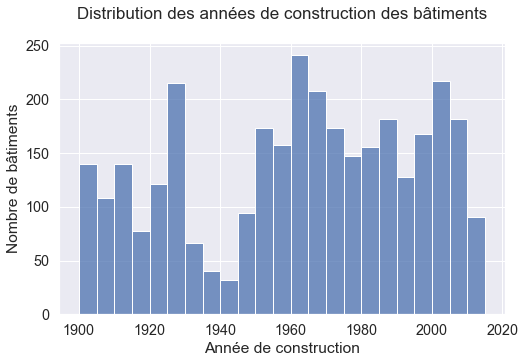

In [59]:
sns.set(font_scale=1.3)
plt.figure(figsize=(8,5))
sns.histplot( x='YearBuilt',  data=new_df, bins=int((new_df.YearBuilt.max() - new_df.YearBuilt.min())/5))
plt.xlabel("Année de construction")
plt.ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n",  fontsize=17)


Plus que l'année de construction, il serait intéressant de traiter l'age des bâtiments pour réduire la dispersion des données et lier l'année des relevés. 

Nous allons donc créer cette nouvelle variable et supprimer l'année de construction :

Text(0.5, 1.0, "Distribution de l'âge des bâtiments\n")

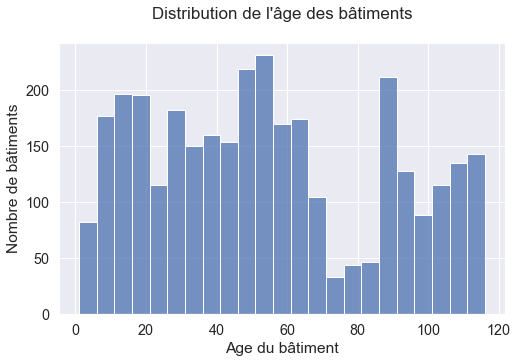

In [60]:
sns.set(font_scale=1.3)
new_df['BuildingAge'] = new_df['DataYear'] - new_df['YearBuilt']
new_df.drop(['YearBuilt','DataYear'], axis=1, inplace=True)

fig = plt.figure(figsize=(8,5))
ax = sns.histplot(data=new_df, x='BuildingAge', bins=int((new_df.BuildingAge.max() - new_df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution de l'âge des bâtiments\n",  fontsize=17)


Regardons à présent si l'âge des bâtiments a un impact sur les émissions de CO2 :

Text(0.5, 1.0, "Influence de l'âge des bâtiments sur les émissions de CO2")

<Figure size 720x360 with 0 Axes>

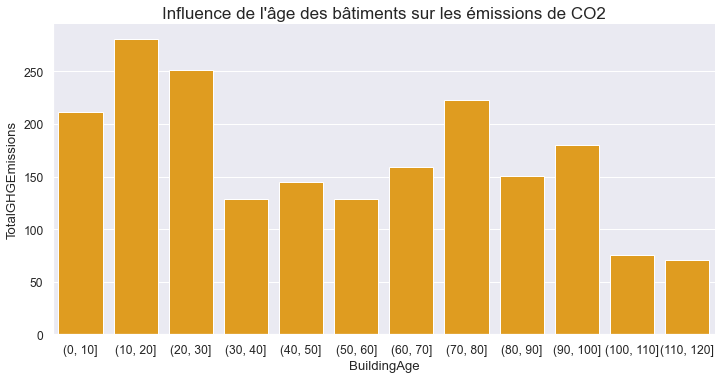

In [120]:
sns.set(font_scale=1.1)
plt.figure(figsize=(10,5))
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), (100,110), (110,120)])
sns.catplot(
    data=new_df, kind="bar",
    x=pd.cut(new_df['BuildingAge'], bins=bins), y="TotalGHGEmissions",color="orange",
    ci=None,  aspect=2)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2", fontsize=17)

Text(0.5, 1.0, "Influence de l'âge des bâtiments sur les consommations d'énergie")

<Figure size 432x288 with 0 Axes>

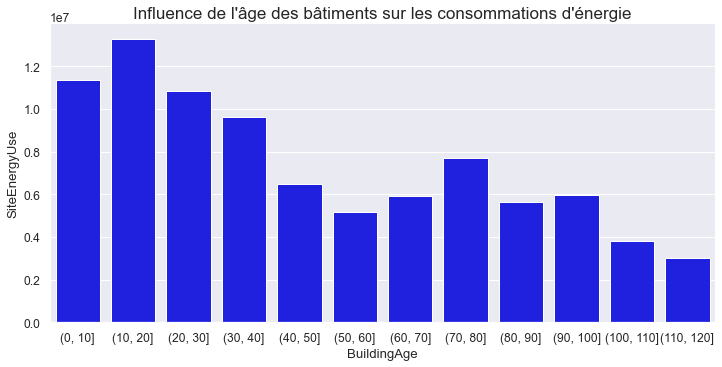

In [121]:
sns.set(font_scale=1.1)
plt.figure(figsize=(6,4))
sns.catplot(
    data=new_df, kind="bar",
    x=pd.cut(new_df['BuildingAge'], bins=bins), y="SiteEnergyUse",ci=None, color="blue", aspect=2)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie",fontsize=17)

### Géolocalisation des bâtiments non-resin

In [61]:
import folium
import folium.plugins

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321
seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lon, in zip(new_df.Latitude, new_df.Longitude):
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

seattle_map

In [63]:
new_df.drop(['Latitude', 'Longitude'], inplace= True, axis=1)

### Valeurs manquantes

In [70]:
import missingno as msno

<AxesSubplot:>

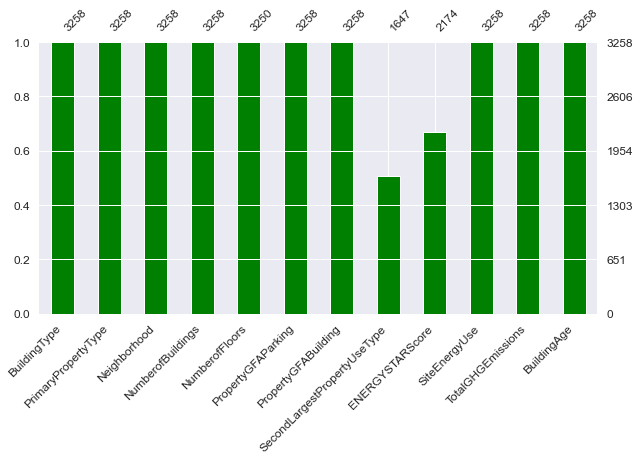

In [71]:
msno.bar(new_df,  figsize=(10,5), fontsize=12, color="green")

In [72]:
new_df.drop(['SecondLargestPropertyUseType'],axis=1, inplace =True)

### CSV

In [73]:
new_df.to_csv("data_part2.csv", index = False)